Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

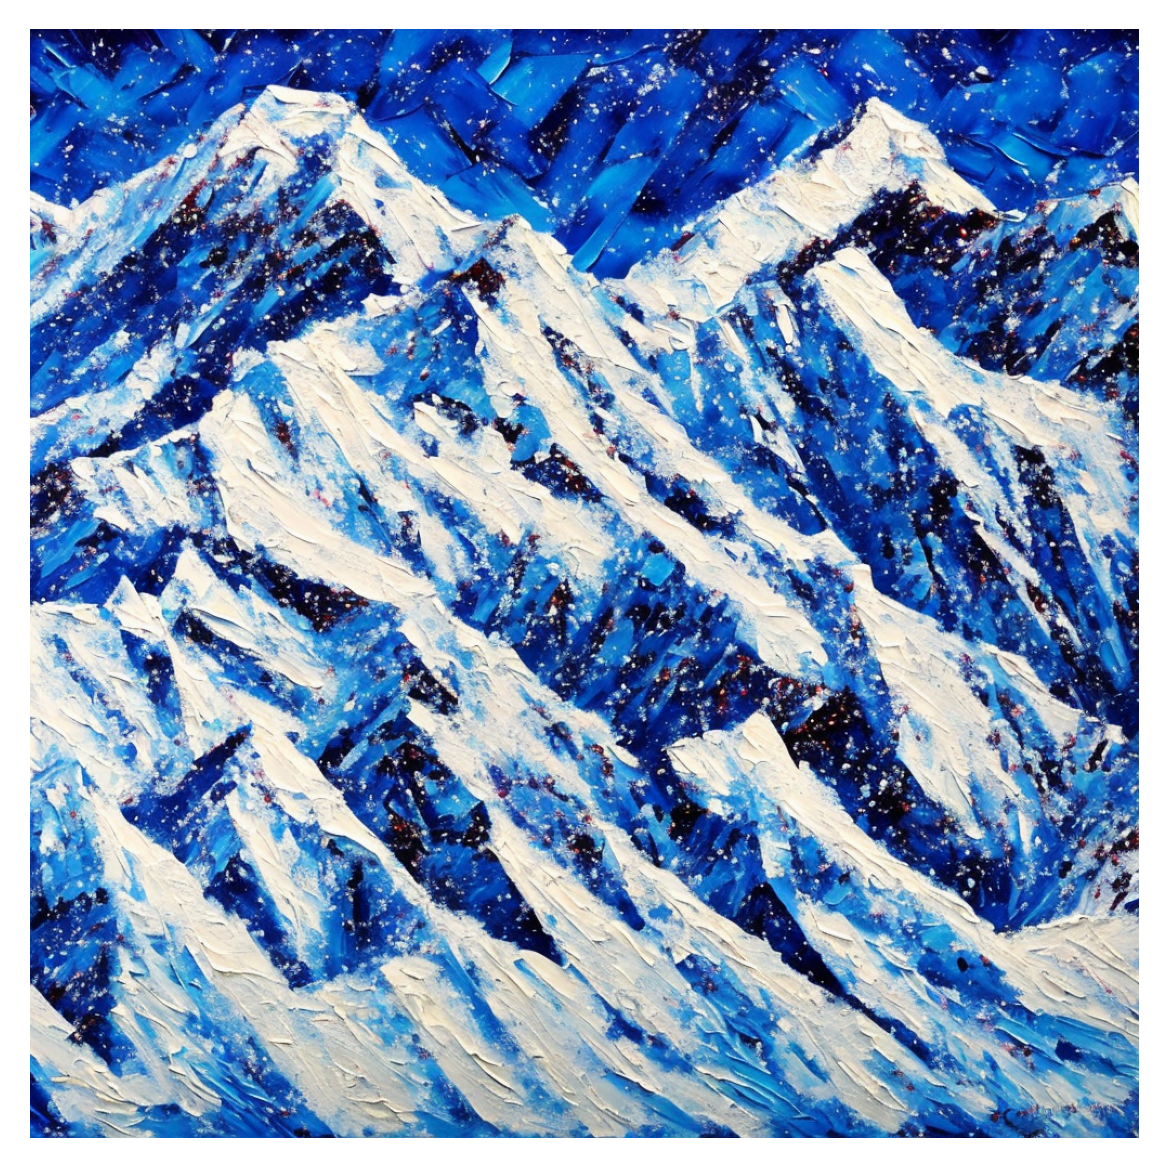

In [6]:
import torch
import requests
from PIL import Image
from io import BytesIO
from matplotlib import pyplot as plt
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# pipeline
model_id = "stabilityai/stable-diffusion-2-1-base"
pipe = StableDiffusionPipeline.from_pretrained(model_id).to(device)

generator = torch.Generator(device=device).manual_seed(42)

# activate pipeline
pipe_output = pipe(
    prompt="Palette knife painting of a winter Mount Everest", # hint sentence
    negative_prompt="Oversaturate, clear, high quality", # sub-hint sentence
    height=1024, width=1024,     # size of picture
    guidance_scale=10,          # degree of influence by sub-hint sentence
    num_inference_steps=50,    # step of inference
    generator=generator        # random seed
)

# output picture
plt.figure(dpi=300)
plt.imshow(pipe_output.images[0])
plt.axis('off')
plt.show()


In [ ]:
# TODO: GAN